In [1]:
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt

warnings.simplefilter(action='ignore', category=FutureWarning)

This function is modified to investigate how the distribution of energy from a single pencil beam spreads laterally - e.g. how far out do we need to go laterally to record 95% of all energy depositions from the beam

In [34]:
def site_energy(e,sim_d, site_d,fraction):
    df = pd.read_csv(f'hits/worldsizeTest/Proton_{e}MeVu_hits_k_1.csv', usecols=['ID event','Energy','X','Y','Z','Particle generated'])
    
    #make a new column "R" which equals sqrt("x2+y2").
    df['R']=(df['X']*df['X'])+(df['Y']*df['Y'])
    
    df['R'] = np.sqrt(df['R'])
    
    print('head and tail of hits file:')
    print(df.head (100))
    print(df.tail (100))
    print('max R: ', df['R'].max())
    
    
    hist = df.hist(column=['X','Y','R','Energy'],bins=300,log=True) #one bin per µm
   # print('max R: ', df['R'].max())
    
   # Matplotlib version of energyplot
    fig2, ax = plt.subplots()
    ax.hist(df['R'],bins=300,log=True)
    ax.set_title('test')
    ax.set_ylim(1e4,4e7)
    
    
    #print unique values of particles generated
    #for entry in ['Particle generated'] print if not equal to 2212 #2212 is proton?, 11 is electron?
#    for x in df['Particle generated']:
#        if x !=2212 and x !=11:
#            print (x)
    
    #find the correct number of bins to get 1µm bins - i.e. find max r and round
    nbins= round(np.max(df['R'])) 
    print ('mean of r and energy: ', np.mean(df['R']), np.mean(df['Energy']))
    
    #Make histogram
    counts, bins, bars = plt.hist(df['R'],bins=nbins)
   # histSum = rHist[0]
    #print ('counts bins bars ', counts, bins,bars)
    #print(bins, len(bins),'bins')

    
    #find out radius that covers "fraction"% of the data
    #print ('counts: ', np.sum(counts), 'and ',fraction,'% of this: ', round(np.sum(counts)*0.01*fraction))
    limit = round(np.sum(counts)*0.01*fraction) #99 of counts

    #sum the histogram bins(counts) until we have 99% of data
    i=0 #counts index
    histSum = counts[i] #adding the counts of first bin
    while histSum < limit:
        i +=1 #go to next bin
        histSum += counts[i] #add next bin
#    else:
#        print ('i: ', i)
        
 
    #print (bin localtion giving over "fraction"% of data #fraction is the variable givin the fraction to include
    #index for the right bin is i
    print('bins[i]= size of world to include', fraction, '% of events:', round(bins[i]),'µm')
#    print('theoretical max e- range 50 MeV: 166 µm')
    
    
   #printing a 2D plot with x-y and a circle with the beam radius
    fig = df.plot(x='X', y='Y', style='o',alpha=0.3, markersize=0.1)
   #    circle2 = plt.Circle((0.5, 0.5), 150, color='blue')


   #show all plt plots???
 #   plt.show()
    
    '''#code from espen - 
    for d in site_d:
        r = d/2
        nm=int(d*1000)
        
        edge=sim_d/2
        
        x = np.arange((-edge+r), edge, d)
        y = np.arange((-edge+r), edge, d)
        z = np.arange((-edge+r), edge, d)
        #z = [7.5]
        
        #MESHGRID FOR SITES

        xx, yy, zz =np.meshgrid(x, y, z)
        xx = xx.flatten()
        yy = yy.flatten()
        zz = zz.flatten()
        test = pd.DataFrame({'X':xx,
                     'Y':yy,
                     'Z':zz}
                     )
        
        #LOOPING THROUGH FILES
        #saving energy given in a site from events
        
        sjekk = pd.DataFrame()

        energy1 = pd.Series()
        n_detectors = 0 
        for row in test.iterrows():
            x = df.loc[np.sqrt((df['X']-row[1]['X'])**2 + (df['Y']-row[1]['Y'])**2 + (df['Z']-row[1]['Z'])**2 ) < r]
            lineal = x.groupby('ID event')['Energy'].sum()
            #print(lineal.head(15))
            energy1 = energy1.append(lineal)
            sjekk = sjekk.append(x)
            n_detectors=n_detectors+1
            if row[0] % 1000 ==0:
                print(row[0])
        sjekk['Partile generated'] = sjekk['Particle generated'].astype(str)
        print(n_detectors)
        print(len(energy1))'''
        
        #energy1.to_csv(f'energy/{sim_d}um/energy_{e}MeV_{nm}nm.csv')

        


Here we input Energy [MeV], simulation diameter (0.5, 2 or 20 µm), site diameter (multiple is possible, e.g. [1,2] for simulation diameter of 2 µm and finally "fraction" of events to cover

head and tail of hits file:
    ID event  Energy       X       Y      Z  Particle generated         R
0          0  0.6744 -0.1134 -0.8373  515.1              2212.0  0.844944
1          0  3.6600 -0.1133 -0.8373  513.1              2212.0  0.844931
2          0  1.1240 -0.1142 -0.8360  511.1              2212.0  0.843764
3          0  1.0720 -0.1151 -0.8347  509.1              2212.0  0.842598
4          0  5.1330 -0.1159 -0.8335  507.1              2212.0  0.841519
..       ...     ...     ...     ...    ...                 ...       ...
95         0  0.3224 -0.2478 -0.7924  325.7              2212.0  0.830242
96         0  0.7623 -0.2497 -0.7918  323.7              2212.0  0.830239
97         0  1.0390 -0.2516 -0.7913  321.7              2212.0  0.830336
98         0  1.7690 -0.2534 -0.7908  319.7              2212.0  0.830407
99         0  0.3978 -0.2553 -0.7903  317.7              2212.0  0.830513

[100 rows x 7 columns]
          ID event  Energy       X      Y      Z  Particle g

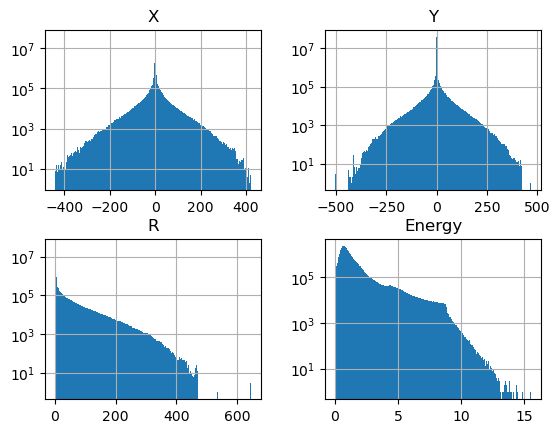

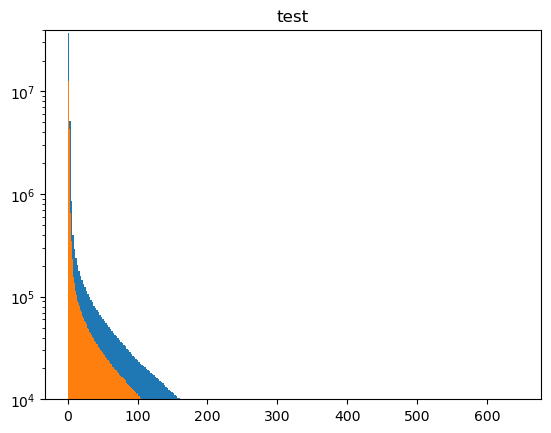

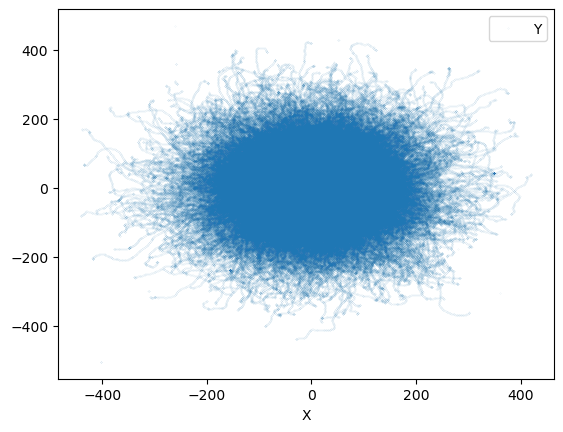

In [35]:
site_energy(100, 2, [5],99) #(e,sim_d, site_d,fraction) #fraction given in "%", e.g. frac=99 means 99%

head and tail of hits file:
   ID event  Energy       X       Y      Z  Particle generated         R
0         0  1.0130 -0.1584  0.3831  165.1                2212  0.414555
1         0  0.7072 -0.1585  0.3828  163.1                2212  0.414316
2         0  3.0900 -0.1587  0.3823  161.1                2212  0.413931
3         0  3.4430 -0.1587  0.3817  159.1                2212  0.413377
4         0  1.1950 -0.1585  0.3812  157.1                2212  0.412839
5         0  1.1780 -0.1582  0.3804  155.1                2212  0.411985
6         0  4.6050 -0.1582  0.3795  153.1                2212  0.411154
7         0  3.0280 -0.1581  0.3781  151.1                2212  0.409823
8         0  1.8600 -0.1583  0.3766  149.1                2212  0.408517
9         0  1.5660 -0.1587  0.3752  147.1                2212  0.407383
          ID event  Energy         X       Y       Z  Particle generated  \
20561991     99999  6.0670  10.25000  8.4550   86.60                  11   
20561992     9999

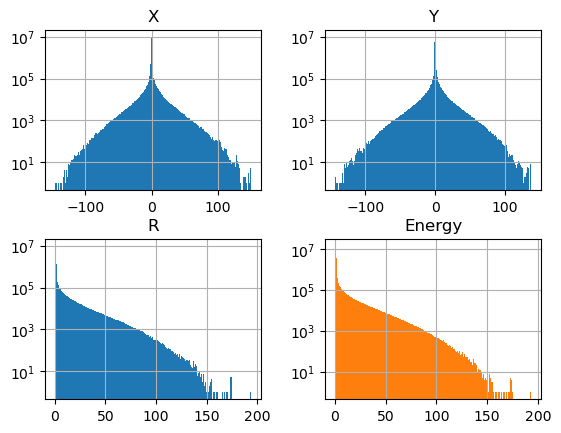

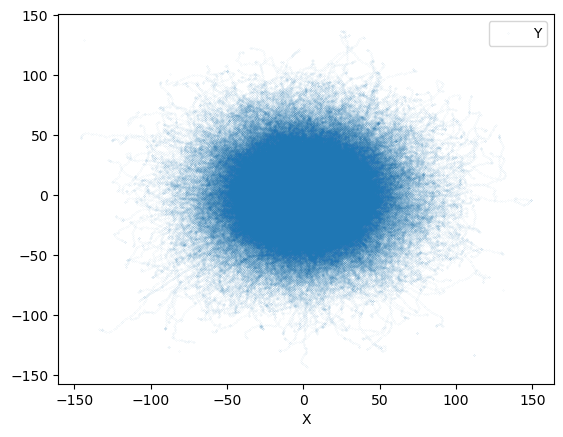

In [15]:
site_energy(50, 20, [5],99.5) #(e,sim_d, site_d,fraction)

head and tail of hits file:
   ID event  Energy       X       Y       Z  Particle generated         R
0         0  16.220  0.3399 -0.4262  1.6000                2212  0.545141
1         0  15.450  0.3496 -0.4247  0.6001                2212  0.550082
2         0  19.150  0.3645 -0.4207 -0.3998                2212  0.556641
3         0  15.680  0.3797 -0.4175 -1.4000                2212  0.564339
4         0  21.150  0.3960 -0.4128 -2.3990                2212  0.572031
5         1   9.924  0.5149 -0.7370  1.6000                2212  0.899050
6         1  14.560  0.5152 -0.7363  0.6000                2212  0.898648
7         1  16.520  0.5163 -0.7377 -0.4000                2212  0.900426
8         1  13.880  0.5122 -0.7391 -1.4000                2212  0.899232
9         1  13.470  0.5075 -0.7394 -2.4000                2212  0.896810
        ID event  Energy       X       Y       Z  Particle generated         R
501397     99998   20.39 -0.9003  0.1184  1.6000                2212  0.908052


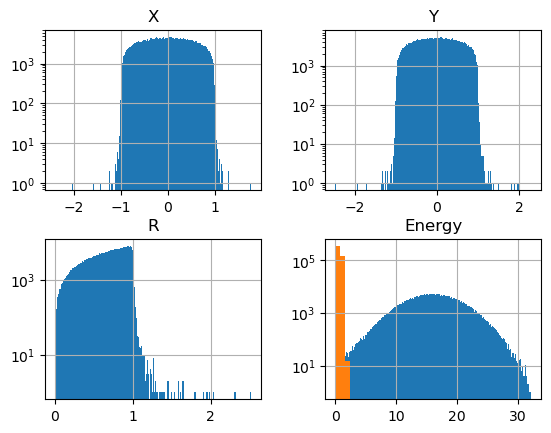

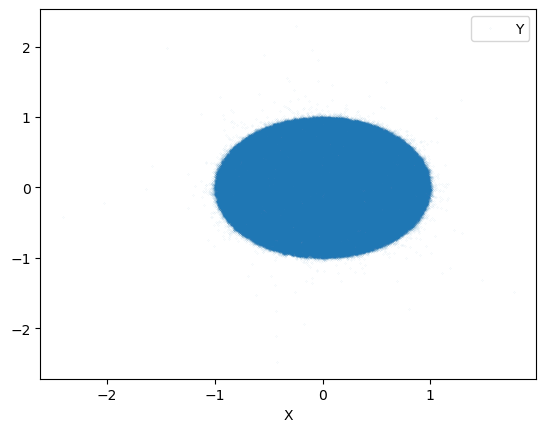

In [16]:
site_energy(2, 20, [5],99.7) #(e,sim_d, site_d,fraction)

head and tail of hits file:
   ID event  Energy       X       Y       Z  Particle generated         R
0         0   25.67 -0.7369  0.3261  1.1000                2212  0.805831
1         0   28.03 -0.7369  0.3395  0.1002                2212  0.811346
2         0   30.41 -0.7474  0.3627 -0.8994                2212  0.830758
3         0   27.49 -0.7648  0.3894 -1.8990                2212  0.858226
4         1   25.46 -0.5600 -0.2649  1.1000                2212  0.619493
5         1   25.75 -0.5585 -0.2599  0.1001                2212  0.616012
6         1   26.39 -0.5478 -0.2497 -0.8997                2212  0.602026
7         1   25.17 -0.5431 -0.2403 -1.9000                2212  0.593887
8         2   31.06 -0.6138  0.3850  1.1000                2212  0.724552
9         2   22.95 -0.6176  0.3914  0.1001                2212  0.731180
        ID event  Energy       X       Y       Z  Particle generated         R
399984     99997   24.81 -0.1115 -0.7568 -0.8995                2212  0.764970


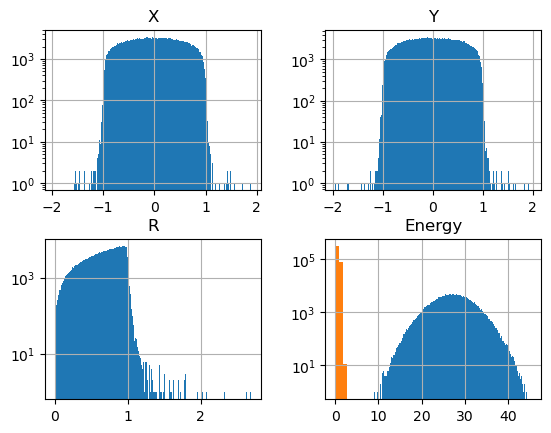

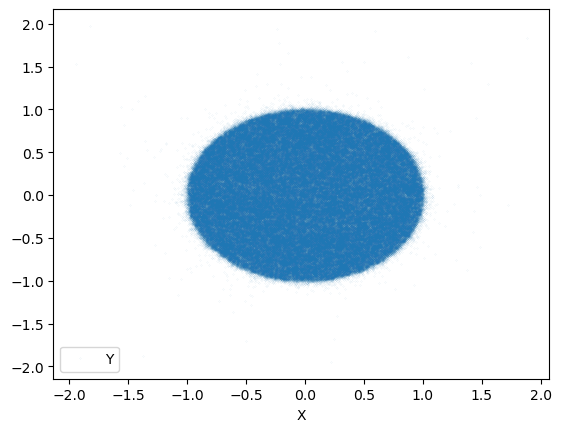

In [17]:
site_energy(1, 20, [5],99.9) #(e,sim_d, site_d,fraction)